# **ADVANCED MACHINE LEARNING**
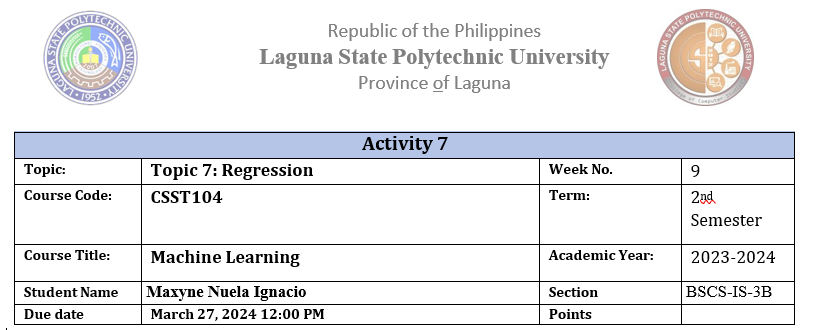

**Topic 7:** Regression

**Student Name:** Maxyne Nuela Ignacio

**Year & Section:** BS Computer Science - IS - 3B


# **Part 1: Data Preprocessing**

**1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**2. Load the Dataset**

In [ ]:
netflix_dataset = pd.read_csv("Netflix_Userbase.csv")
print(netflix_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB
None


**3. Missing Values: Identify and manage any missing values appropriately.**

In [ ]:
missing_values = netflix_dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


**4.	Encode Categorical Variables: Transform categorical variables into numerical representations suitable for regression analysis.**

In [ ]:
netflix_data_encoded = pd.get_dummies(netflix_dataset, drop_first=True)

print(netflix_data_encoded.columns)

print(netflix_data_encoded.head())



Index(['User ID', 'Monthly Revenue', 'Age', 'Subscription Type_Premium',
       'Subscription Type_Standard', 'Join Date_01-05-23',
       'Join Date_01-06-22', 'Join Date_01-07-22', 'Join Date_01-08-22',
       'Join Date_01-09-22',
       ...
       'Country_Germany', 'Country_Italy', 'Country_Mexico', 'Country_Spain',
       'Country_United Kingdom', 'Country_United States', 'Gender_Male',
       'Device_Smart TV', 'Device_Smartphone', 'Device_Tablet'],
      dtype='object', length=342)
   User ID  Monthly Revenue  Age  Subscription Type_Premium  \
0        1               10   28                          0   
1        2               15   35                          1   
2        3               12   42                          0   
3        4               12   51                          0   
4        5               10   33                          0   

   Subscription Type_Standard  Join Date_01-05-23  Join Date_01-06-22  \
0                           0                   0    

**5.	Feature Selection: Decide which features to include in the regression models. Explain your choice.**

In [ ]:
features_regression = ['Subscription Type', 'Country', 'Age', 'Gender', 'Device', 'Plan Duration']
selected_features_linear = ["Age"]
selected_features_logistic = ["Age", "Subscription_Type", "Device"]

# **Part 2: Exploratory Data Analysis**

**1. Descriptive Statistics: Provide a summary of the data using the .describe() method.**

In [ ]:
print(netflix_data_encoded.describe())

          User ID  Monthly Revenue          Age  Subscription Type_Premium  \
count  2500.00000      2500.000000  2500.000000                 2500.00000   
mean   1250.50000        12.508400    38.795600                    0.29320   
std     721.83216         1.686851     7.171778                    0.45532   
min       1.00000        10.000000    26.000000                    0.00000   
25%     625.75000        11.000000    32.000000                    0.00000   
50%    1250.50000        12.000000    39.000000                    0.00000   
75%    1875.25000        14.000000    45.000000                    1.00000   
max    2500.00000        15.000000    51.000000                    1.00000   

       Subscription Type_Standard  Join Date_01-05-23  Join Date_01-06-22  \
count                 2500.000000           2500.0000         2500.000000   
mean                     0.307200              0.0004            0.001200   
std                      0.461425              0.0200            0

**2.	Visualizations: Create visualizations (e.g., distribution of Monthly Revenue, user demographics) to understand the data better.**

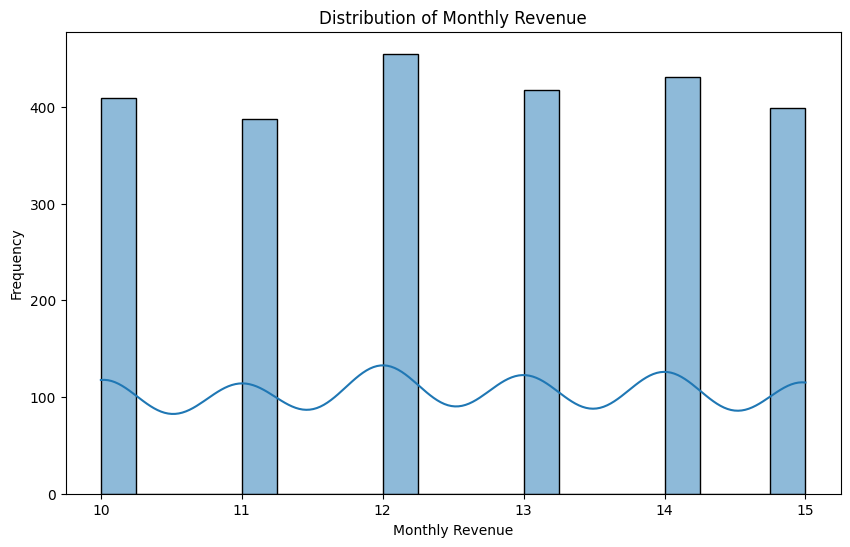

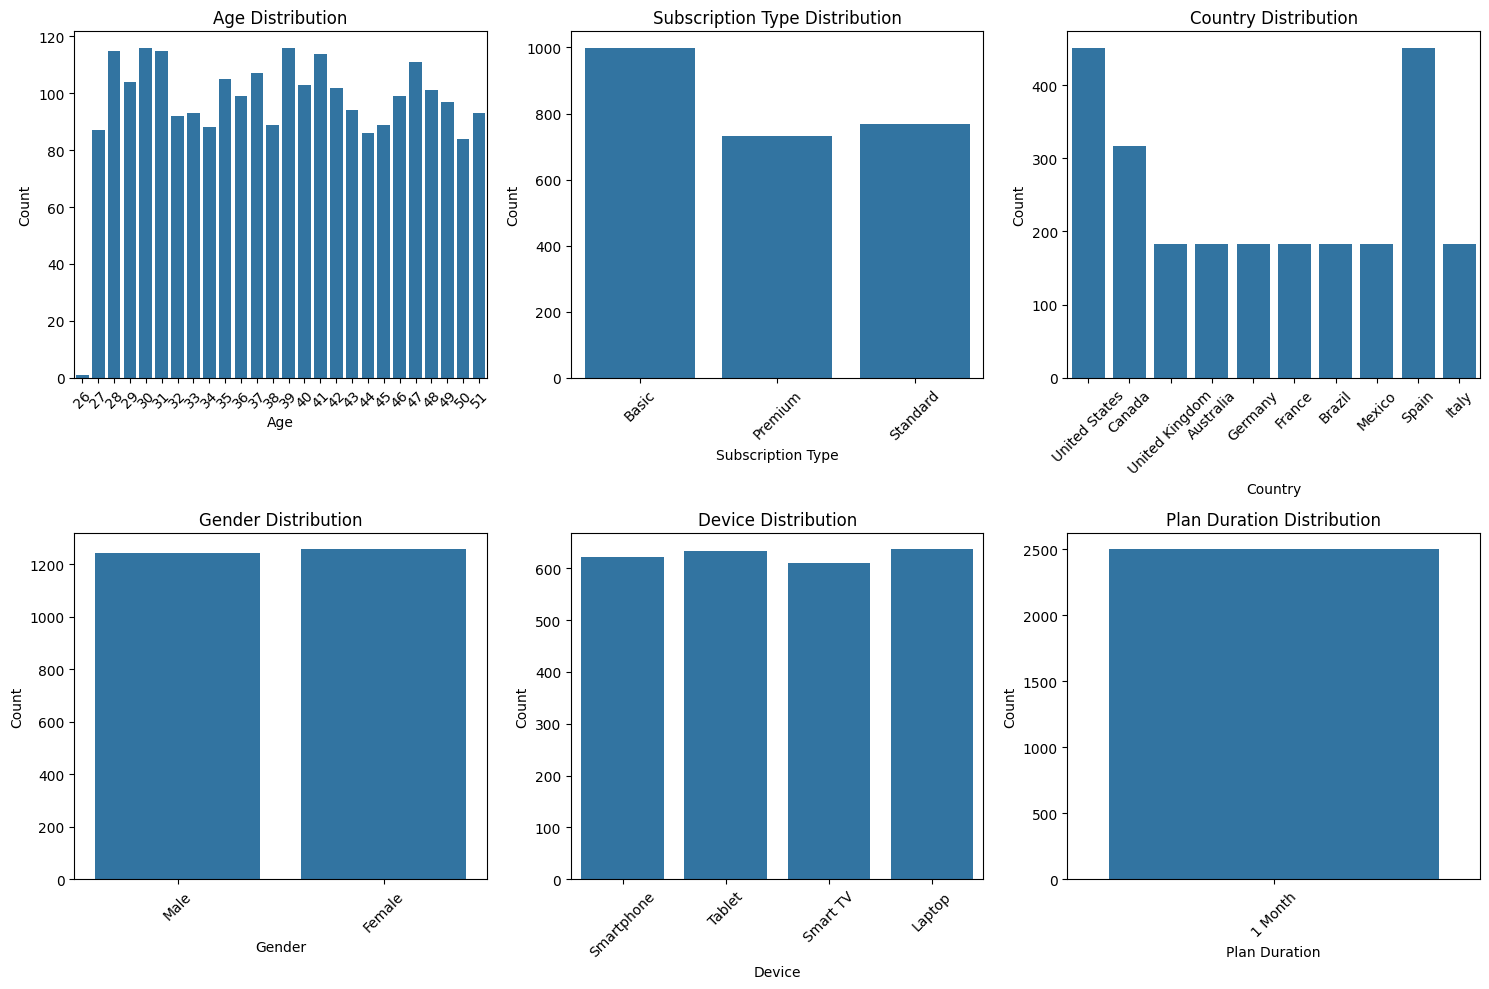

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(netflix_dataset['Monthly Revenue'], bins=20, kde=True)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

demographics = ['Age', 'Subscription Type', 'Country', 'Gender', 'Device', 'Plan Duration']

plt.figure(figsize=(15, 10))
for i, demographic in enumerate(demographics, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=netflix_dataset, x=demographic)
    plt.title(f'{demographic} Distribution')
    plt.xlabel(demographic)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Part 3: Linear Regression Model (Predicting Monthly Revenue)**

**1. Build the Model: Develop a linear regression model to predict the Monthly Revenue based on selected features.**

In [ ]:
X = netflix_data_encoded[['Age']]
y = netflix_data_encoded['Monthly Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred = linear_reg_model.predict(X_test)

**2. Model Evaluation: Evaluate the model using R-squared, RMSE, or other relevant metrics.**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 2.7813087733291315
R-squared: -0.006933994071707472


# **Part 4: Logistic Regression Model (Predicting Customer Feedback)**

**1. Model Building: Assuming a binary feedback variable (positive/negative), construct a logistic regression model to predict feedback based on user demographics and subscription details.**

In [ ]:
le = LabelEncoder()
netflix_data_encoded["Monthly Revenue"] = le.fit_transform(netflix_data_encoded["Monthly Revenue"])


X_logistic = netflix_data_encoded[selected_features_linear]
y_logistic = netflix_data_encoded["Monthly Revenue"]
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)

# Model Evaluation
y_pred_logistic = logistic_model.predict(X_test_logistic)
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic, average='weighted')
recall = recall_score(y_test_logistic, y_pred_logistic, average='weighted')
f1 = f1_score(y_test_logistic, y_pred_logistic, average='weighted')
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)

print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Logistic Regression Model Evaluation:
Accuracy: 0.19
Precision: 0.09554884924312636
Recall: 0.19
F1-score: 0.11761118917210754
Confusion Matrix:
[[ 0  0 56 24  5  0]
 [ 0  0 41 30  8  0]
 [ 0  0 55 28 10  0]
 [ 0  0 44 33 11  0]
 [ 0  0 54 24  7  0]
 [ 0  0 36 27  7  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Part 5: Comparative Analysis and Visualization**

**1. Feature Importance: Examine the significance of different features in both regression models.**

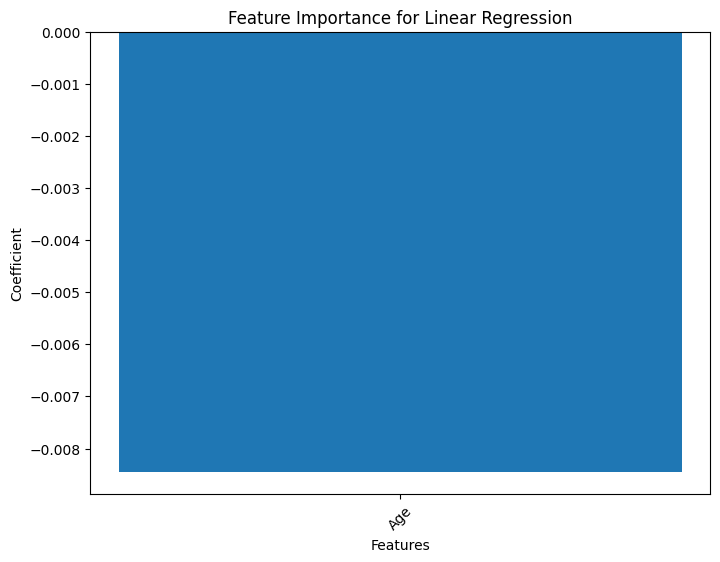

In [ ]:
linear_model = linear_reg_model
linear_regression_coefficients = linear_model.coef_[0]
plt.figure(figsize=(8, 6))
plt.bar(X_test.columns, linear_regression_coefficients)
plt.title("Feature Importance for Linear Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.xticks(rotation=45)
plt.show()

**2. •	Insights: Draw insights from the models' predictions, focusing on how various factors might influence Monthly Revenue and feedback.**

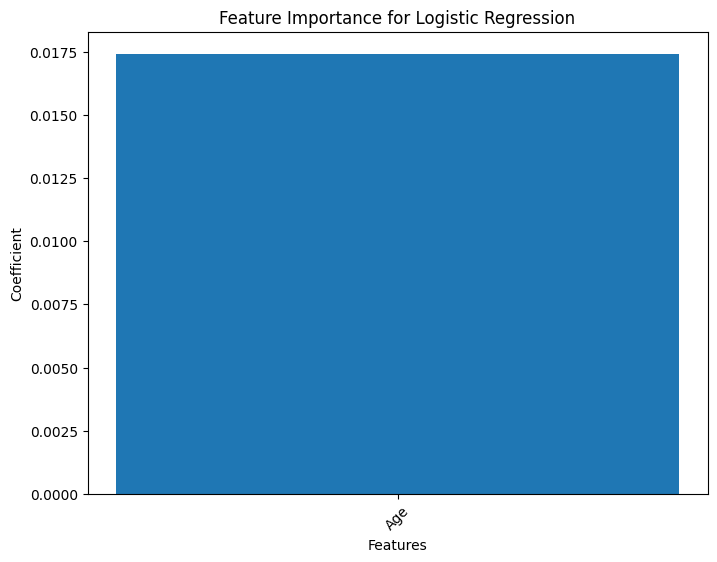

In [ ]:
logistic_regression_coefficients = logistic_model.coef_[0]
plt.figure(figsize=(8, 6))
plt.bar(X_logistic.columns, logistic_regression_coefficients)
plt.title("Feature Importance for Logistic Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.xticks(rotation=45)
plt.show()
